# BIKE RENTAL 

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from random import randrange,uniform
from sklearn.metrics import r2_score
from scipy import stats

In [2]:
from sklearn.neighbors import KNeighborsRegressor
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error
from scipy.stats import pearsonr 
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR

In [3]:
# Load Data
Data_Day = pd.read_csv("C:\\Users\\aishu\\OneDrive\\Documents\\bike rental.csv")

In [4]:
Data_Day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2011,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,02-01-2011,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,03-01-2011,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,04-01-2011,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,05-01-2011,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


# EXPLORATORY DATA ANALYSIS

In [7]:
#Check Type of DataFrame
print(type(Data_Day))

<class 'pandas.core.frame.DataFrame'>


In [8]:
#Data Types of Varaibles

print(Data_Day.dtypes)

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object


In [9]:
#unique values present in each variable

print(Data_Day.nunique())

instant       731
dteday        731
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          499
atemp         690
hum           595
windspeed     650
casual        606
registered    679
cnt           696
dtype: int64


In [10]:
# variable "instant" can be dropped as it simply represents the index
# Variable "dteday" can be ignored as output is not based on time series analysis
# casual and registered variables can be removed, as these two sums to dependent variable count

Data_Day = Data_Day.drop(Data_Day.columns[[0, 1, 13, 14]], axis = "columns")

print(Data_Day.shape)

(731, 12)


In [11]:
#Defining numeric and categorical variables and saving in specific array

numeric_var = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

categorical_var = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']

# DATA PRE PROCESSING

## Missing Value Analysis

In [12]:
#sum of missing values 

Data_Day.isnull().sum()

season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64

 No missing values found

## Outlier Analysis

temp


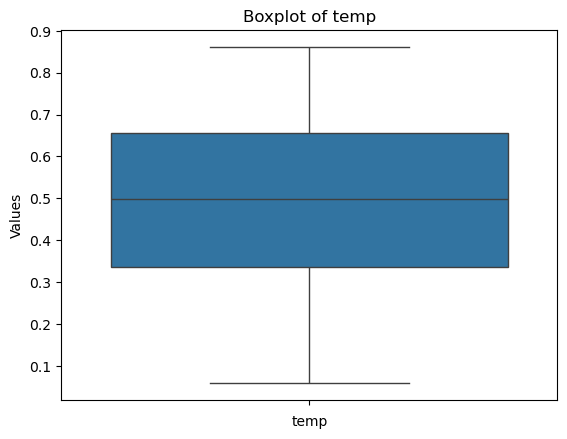

atemp


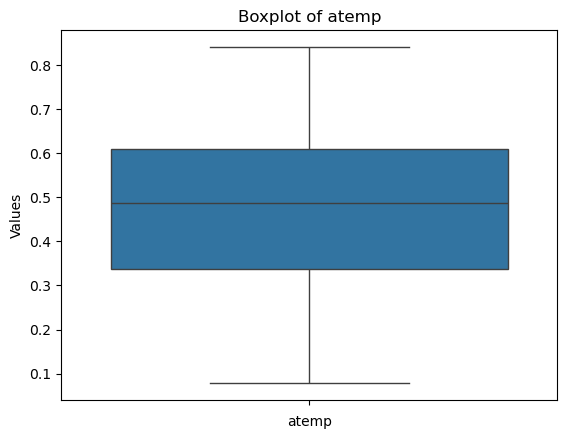

hum


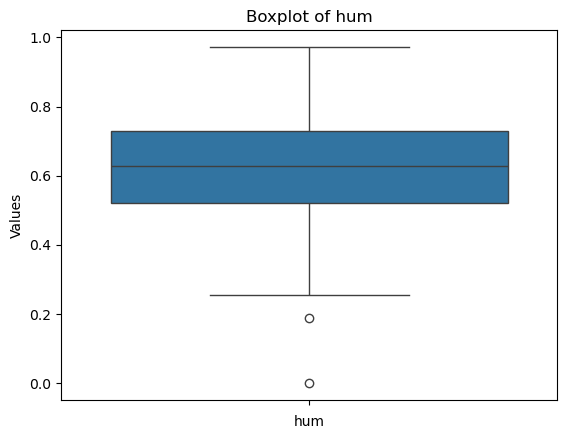

windspeed


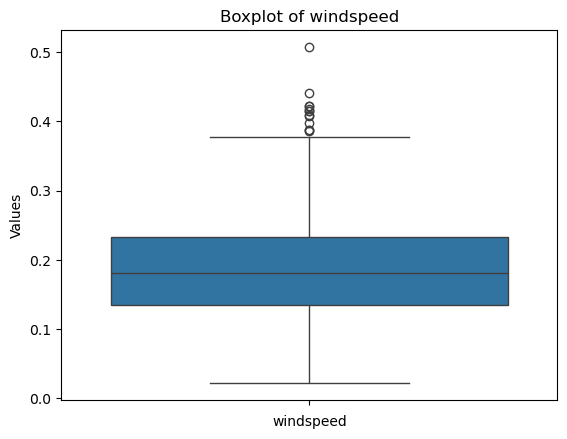

cnt


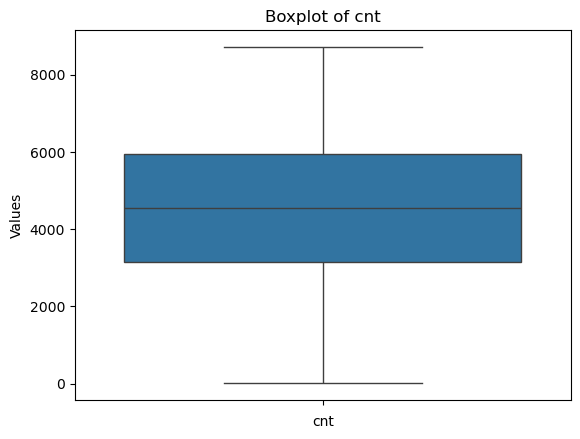

In [13]:
for i in numeric_var:
    print(i)
    sns.boxplot(y = Data_Day[i])
    plt.xlabel(i)
    plt.ylabel("Values")
    plt.title("Boxplot of " + i)
    plt.show()

### outliers are found in windspeed and humidity variables.

In [14]:
# Identify outliers
#calculate Inner Fence, Outer Fence, and IQR

for i in numeric_var:
    print(i)
    q75, q25 = np.percentile(Data_Day.loc[:,i], [75, 25])
    iqr = q75 - q25
    Innerfence = q25 - (iqr*1.5)
    Upperfence = q75 + (iqr*1.5)
    print("Innerfence= "+str(Innerfence))
    print("Upperfence= "+str(Upperfence)) 
    print("IQR ="+str(iqr))
    

# replace outliers with NA

    Data_Day.loc[Data_Day[i]<Innerfence, i] = np.nan
    Data_Day.loc[Data_Day[i]>Upperfence, i] = np.nan

temp
Innerfence= -0.14041600000000015
Upperfence= 1.1329160000000003
IQR =0.3183330000000001
atemp
Innerfence= -0.06829675000000018
Upperfence= 1.0147412500000002
IQR =0.2707595000000001
hum
Innerfence= 0.20468725
Upperfence= 1.0455212500000002
IQR =0.21020850000000002
windspeed
Innerfence= -0.012446750000000034
Upperfence= 0.38061125
IQR =0.0982645
cnt
Innerfence= -1054.0
Upperfence= 10162.0
IQR =2804.0


In [15]:
Data_Day.isnull().sum()

season         0
yr             0
mnth           0
holiday        0
weekday        0
workingday     0
weathersit     0
temp           0
atemp          0
hum            2
windspeed     13
cnt            0
dtype: int64

In [16]:
# total 15 outliers found. Now, impute the values, by the help of median.

Data_Day['hum'] = Data_Day['hum'].fillna(Data_Day['hum'].median())
Data_Day['windspeed'] = Data_Day['windspeed'].fillna(Data_Day['windspeed'].median())

In [17]:
# Check NA Values

Data_Day.isnull().sum()

season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64

## DATA UNDERSTANDING

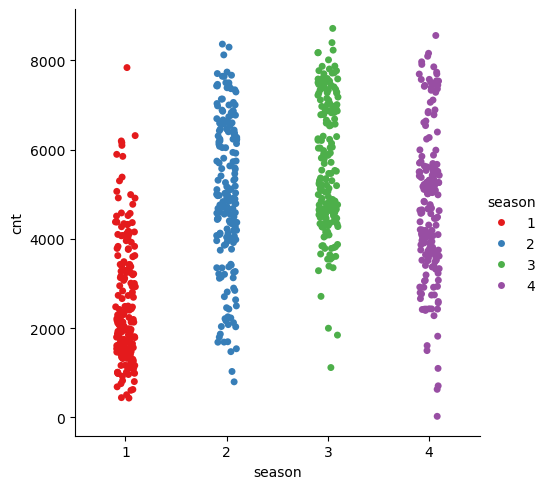

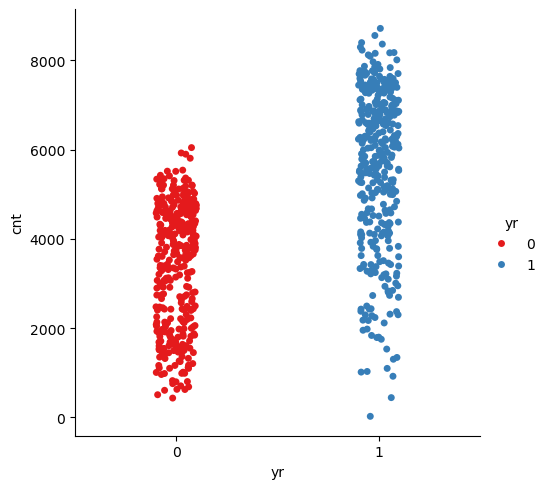

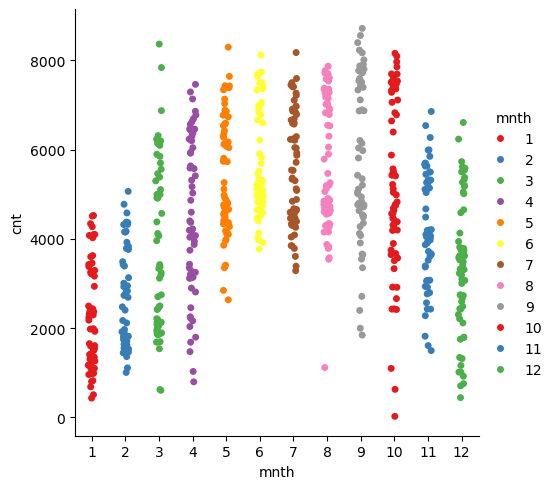

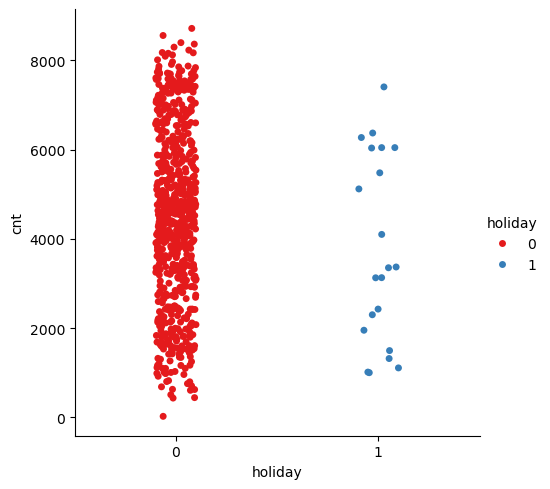

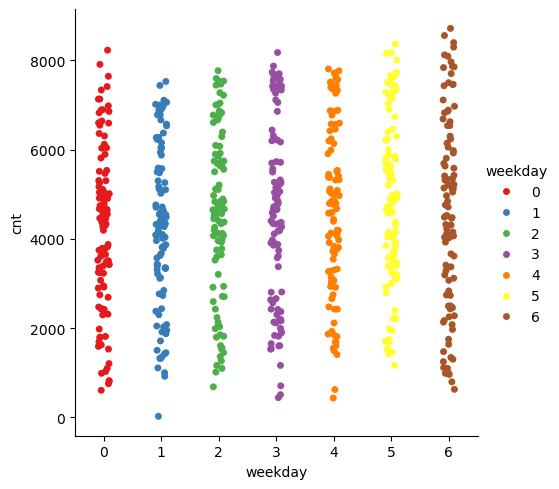

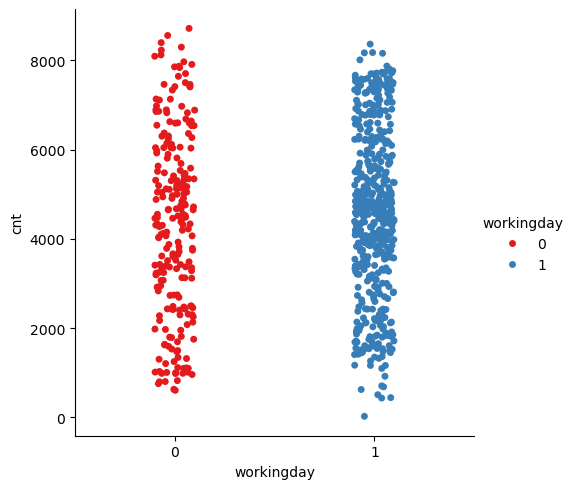

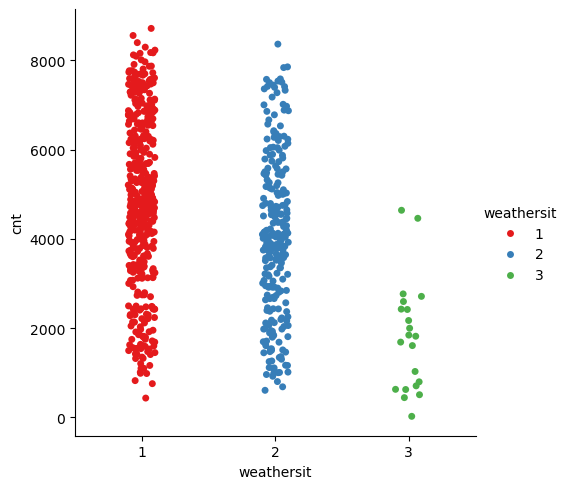

In [18]:
for i in categorical_var:
    sns.catplot(x = i, y = "cnt", hue=i, palette='Set1', data=Data_Day)
   
  

 It is found that
 In Season 2, 3 and 4 has the highest count
 In Year 1 has high count than 0
 In Months 3 to 10 has got pretty good count
 On holidays the count is higher compared non-holidays
 In weekdays, 0 and 6 has the highest count
 In weather, 1 has the highest count

Text(0.5, 0, 'Windspeed')

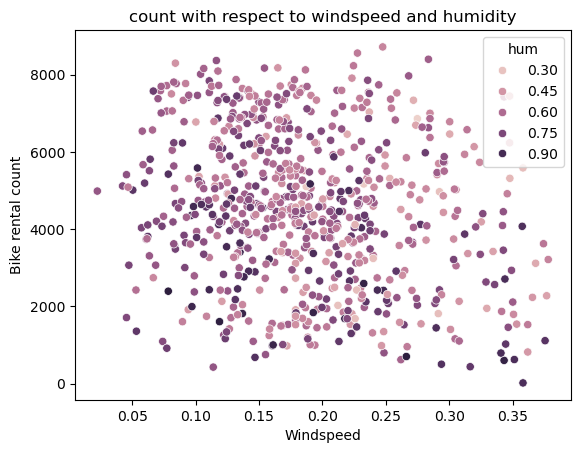

In [19]:
scatter_plot1 = sns.scatterplot(x="windspeed", y="cnt", hue="hum", data= Data_Day)

plt.title("count with respect to windspeed and humidity")
plt.ylabel("Bike rental count")
plt.xlabel("Windspeed")


 count vs windspeed and humidity, Count is High in ranges, windspeed 0.10 to 0.25  and humidity 0.5 to 0.75

Text(0.5, 0, 'Weekdays')

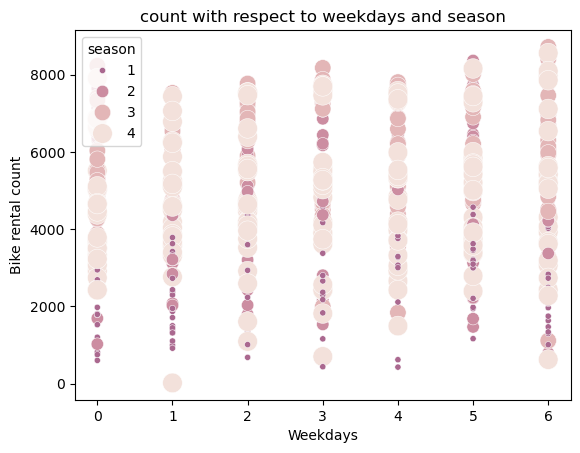

In [20]:
cmap = sns.cubehelix_palette(dark=.9, light=.5, as_cmap=True)

scatter_plot2 = sns.scatterplot(x="weekday", y="cnt",
            hue="season", size="season", sizes = (20, 200), palette=cmap, data= Data_Day)

plt.title("count with respect to weekdays and season")
plt.ylabel("Bike rental count")
plt.xlabel("Weekdays")



count vs weekdays and season, Count is high in 4th season and 1st and 6th weekdays 

Text(0.5, 0, 'Temperature')

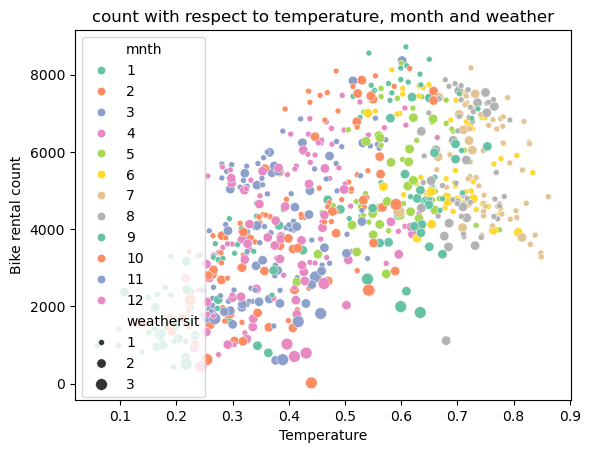

In [21]:
cmap2 = sns.cubehelix_palette(dark=.3, light=.8, as_cmap=True)

scatter_plot3 = sns.scatterplot(x="temp", y="cnt", hue="mnth", size="weathersit", palette="Set2", data=Data_Day)

plt.title("count with respect to temperature, month and weather")
plt.ylabel("Bike rental count")
plt.xlabel("Temperature")



### count vs  temperature, month and weather, Count is high in range temperature 0.5 to 0.8, in 8th month and weather is 0.

Text(0.5, 0, 'Month')

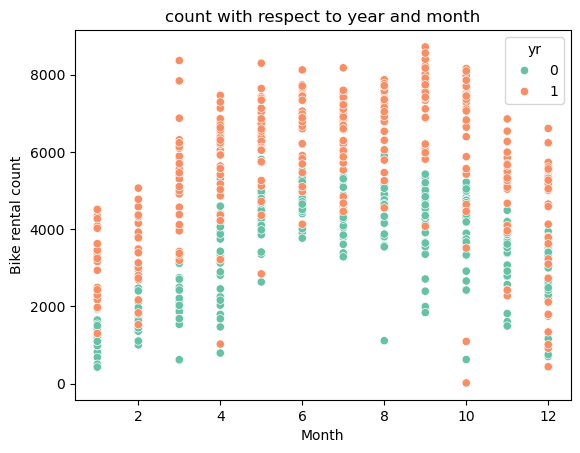

In [22]:
cmap3 = sns.cubehelix_palette(dark=.3, light=.8, as_cmap=True)

scatter_plot4 = sns.scatterplot(x="mnth", y="cnt", hue="yr", palette="Set2", data= Data_Day)

plt.title("count with respect to year and month")
plt.ylabel("Bike rental count")
plt.xlabel("Month")


### count vs respect to year and month, count is high in year 1, particularly from season 3 to 12 excluding 9 

# FEATURE SELECTION

In [23]:
# Correlation Analysis and Anova test to find varaibles which can be excluded

Data_Day_cor = Data_Day.loc[:, numeric_var]
correlation_result = Data_Day_cor.corr()
print(correlation_result)

               temp     atemp       hum  windspeed       cnt
temp       1.000000  0.991702  0.123723  -0.138937  0.627494
atemp      0.991702  1.000000  0.137312  -0.164157  0.631066
hum        0.123723  0.137312  1.000000  -0.200237 -0.121454
windspeed -0.138937 -0.164157 -0.200237   1.000000 -0.215203
cnt        0.627494  0.631066 -0.121454  -0.215203  1.000000


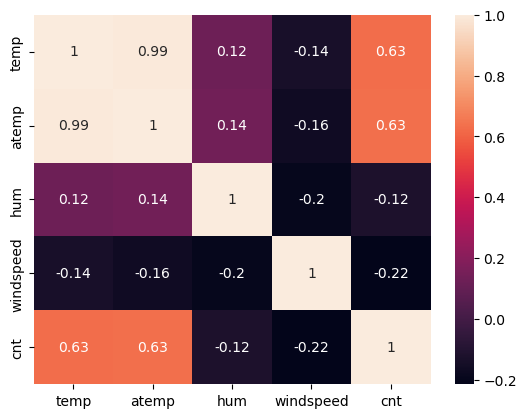

In [24]:
heatmap = sns.heatmap(correlation_result, annot=True)

### It is found that temperature and atemp are highly correlated with each other.

In [25]:
# Anova Test

import statsmodels.api as sm
from statsmodels.formula.api import ols

for i in categorical_var:
    mod = ols('cnt' + '~' + i, data = Data_Day).fit()
    anova_table = sm.stats.anova_lm(mod, typ = 2)
    print(anova_table)

                sum_sq     df           F        PR(>F)
season    4.517974e+08    1.0  143.967653  2.133997e-30
Residual  2.287738e+09  729.0         NaN           NaN
                sum_sq     df           F        PR(>F)
yr        8.798289e+08    1.0  344.890586  2.483540e-63
Residual  1.859706e+09  729.0         NaN           NaN
                sum_sq     df          F        PR(>F)
mnth      2.147445e+08    1.0  62.004625  1.243112e-14
Residual  2.524791e+09  729.0        NaN           NaN
                sum_sq     df         F    PR(>F)
holiday   1.279749e+07    1.0  3.421441  0.064759
Residual  2.726738e+09  729.0       NaN       NaN
                sum_sq     df         F    PR(>F)
weekday   1.246109e+07    1.0  3.331091  0.068391
Residual  2.727074e+09  729.0       NaN       NaN
                  sum_sq     df         F    PR(>F)
workingday  1.024604e+07    1.0  2.736742  0.098495
Residual    2.729289e+09  729.0       NaN       NaN
                  sum_sq     df          F 

In [26]:
#Dimension Reduction

Data_Day = Data_Day.drop(['atemp', 'holiday', 'weekday', 'workingday'], axis = "columns")
print(Data_Day.shape)

(731, 8)


In [27]:
#Final Variables

numeric_var = ["temp","hum","windspeed","cnt"]   # numeric variables

categorical_var = ["season", "yr", "mnth", "weathersit"]   # categorical variables

## FEATURE SCALING

temp


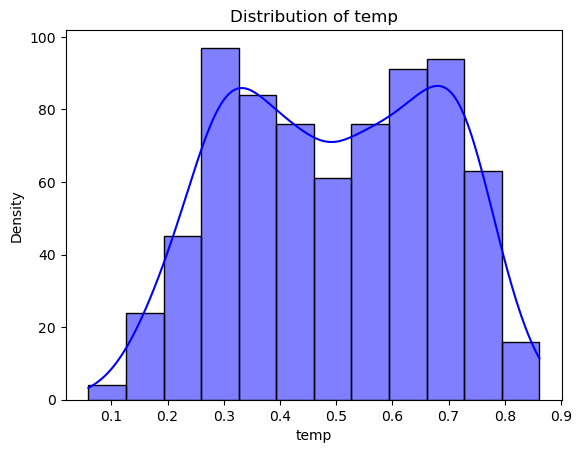

hum


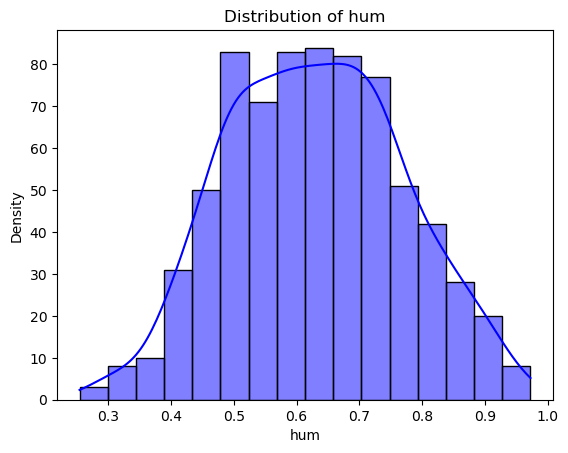

windspeed


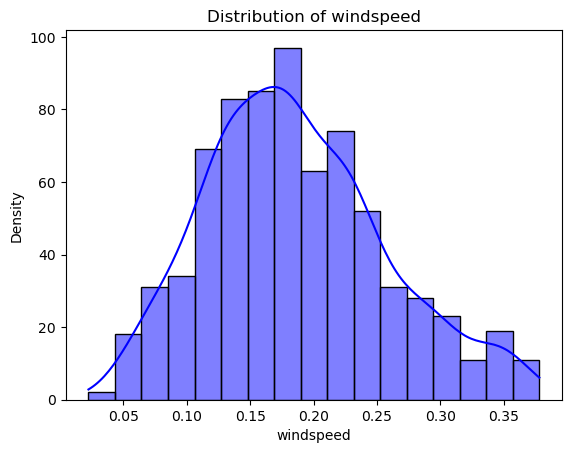

cnt


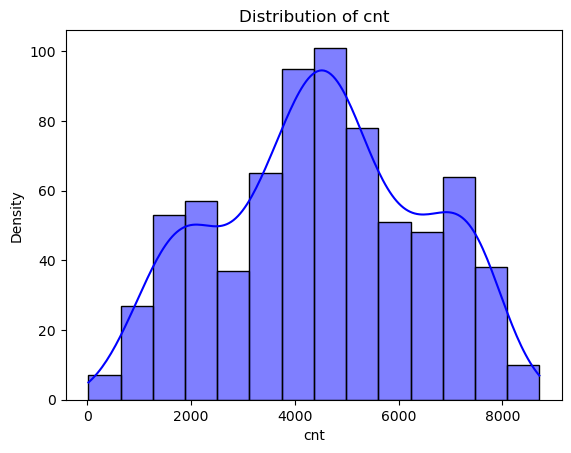

In [28]:
# Check normality 
for i in numeric_var:
    print(i)
    sns.histplot(Data_Day[i], bins = 'auto', kde=True, color = 'blue')
    plt.title("Distribution of "+i)
    plt.ylabel("Density")
    plt.show()

### distributions are, approximately symmetric

In [29]:
# Check min and max values 

Data_Day.describe()

,season,yr,mnth,weathersit,temp,hum,windspeed,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,2.496580,0.500684,6.519836,1.395349,0.495385,0.629354,0.186257,4504.348837
std,1.110807,0.500342,3.451913,0.544894,0.183051,0.139566,0.071156,1937.211452
min,1.000000,0.000000,1.000000,1.000000,0.059130,0.254167,0.022392,22.000000
25%,2.000000,0.000000,4.000000,1.000000,0.337083,0.522291,0.134950,3152.000000
50%,3.000000,1.000000,7.000000,1.000000,0.498333,0.627500,0.178802,4548.000000
75%,3.000000,1.000000,10.000000,2.000000,0.655417,0.730209,0.229785,5956.000000
max,4.000000,1.000000,12.000000,3.000000,0.861667,0.972500,0.378108,8714.000000


### everything is normalized, no need of scaling

# MODEL DEVELOPMENT

In [30]:
df = Data_Day.copy()
Data_Day = df.copy()

In [31]:
# Create dummy variables

Data_Day = pd.get_dummies(Data_Day, columns = categorical_var) 

Data_Day.shape

(731, 25)

In [32]:
Data_Day.head()

,temp,hum,windspeed,cnt,season_1,season_2,season_3,season_4,yr_0,yr_1,...,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,weathersit_1,weathersit_2,weathersit_3
0,0.344167,0.805833,0.160446,985.0,True,False,False,False,True,False,...,False,False,False,False,False,False,False,False,True,False
1,0.363478,0.696087,0.248539,801.0,True,False,False,False,True,False,...,False,False,False,False,False,False,False,False,True,False
2,0.196364,0.437273,0.248309,1349.0,True,False,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False
3,0.200000,0.590435,0.160296,1562.0,True,False,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False
4,0.226957,0.436957,0.186900,1600.0,True,False,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False


In [33]:
df_for_KFCV = Data_Day

In [35]:
#define Error Metrics.

def MAPE(y_actual, y_predicted):
    MAPE = np.mean(np.abs(y_actual-y_predicted)/y_actual)*100
    return MAPE

def Rsquare(y_actual, y_predicted):
    Rsquare = np.corrcoef(y_actual,y_predicted)**2
    return Rsquare

In [36]:
#predictors and target

X = Data_Day.drop(['cnt'], axis = "columns")
y = Data_Day['cnt']

In [37]:
#divide the data into train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=0)

## DECISION TREE

In [38]:
DTModel = DecisionTreeRegressor(max_depth=2).fit(X_train,y_train)

# Prediction

DTTest = DTModel.predict(X_test)

# MAPE
DTMape_Test = MAPE(y_test, DTTest)


# Rsquare - Test Data

DTR2_Test = Rsquare(y_test, DTTest)

DTR2_Test1 = DTR2_Test.ravel()

DTR2_Test2 = float(DTR2_Test1[1])


print("MAPE ="+str(DTMape_Test))
print("Accuracy =" + str(100 - DTMape_Test))
print("Rsquare ="+str(DTR2_Test2))

MAPE =36.94809301452644
Accuracy =63.05190698547356
Rsquare =0.6544606873373333


In [39]:
print(repr(DTModel))

DecisionTreeRegressor(max_depth=2)


## RANDOM FOREST

In [40]:
RFModel = RandomForestRegressor(n_estimators=100).fit(X_train,y_train)

# Predictions
RFTest = RFModel.predict(X_test)

# MAPE 
RFMape_Test = MAPE(y_test, RFTest)

# Rsquare - Test Data

RFR2_Test = Rsquare(y_test, RFTest)

RFR2_Test1 = RFR2_Test.ravel()

RFR2_Test2 = float(RFR2_Test1[1])

print("MAPE ="+str(RFMape_Test))
print("Accuracy =" + str(100 - RFMape_Test))
print("Rsquare ="+str(RFR2_Test2))

MAPE =20.858741627538524
Accuracy =79.14125837246148
Rsquare =0.8873012288585352


# LINEAR REGRESSION MODEL

In [42]:
LR=LinearRegression() # object creation
LR.fit(X_train,y_train)
y_predict=LR.predict(X_test)

In [43]:
#Prediction

LRTest = LR.predict(X_test)

#MAPE

LRMape_Test = MAPE(y_test, LRTest)


#Rsquare -Test Data

LRR2_Test = Rsquare(y_test, LRTest)

LRR2_Test1 = LRR2_Test.ravel()

LRR2_Test2 = float(LRR2_Test1[1])


print("MAPE ="+str(LRMape_Test))
print("Accuracy =" + str(100 - LRMape_Test))
print("Rsquare ="+str(LRR2_Test2))



MAPE =18.782083030717047
Accuracy =81.21791696928295
Rsquare =0.8434693684177553


# KNN 

In [44]:
knn_model = KNeighborsRegressor(n_neighbors=5)

In [45]:
print(knn_model.fit(X_train,y_train))

KNeighborsRegressor()


In [46]:
# Predictions
KNNTest = knn_model.predict(X_test)

# MAPE 
KNNMape_Test = MAPE(y_test, KNNTest)

# Rsquare - Test Data

KNNR2_Test = Rsquare(y_test, KNNTest)

KNNR2_Test1 = KNNR2_Test.ravel()

KNNR2_Test2 = float(KNNR2_Test1[1])

print("MAPE ="+str(KNNMape_Test))
print("Accuracy =" + str(100 - KNNMape_Test))
print("Rsquare ="+str(KNNR2_Test2))

MAPE =21.478446550328336
Accuracy =78.52155344967167
Rsquare =0.8419006004824972


# Support Vector Regressor(SVR) 

In [48]:
svr_model = SVR(kernel='rbf', C=1e3, gamma=0.1)

In [49]:
print(svr_model.fit(X_train, y_train))

SVR(C=1000.0, gamma=0.1)


In [50]:

# Predictions
SVRTest = svr_model.predict(X_test)

# MAPE 
SVRMape_Test = MAPE(y_test, SVRTest)

# Rsquare - Test Data

SVRR2_Test = Rsquare(y_test, SVRTest)

SVRR2_Test1 = SVRR2_Test.ravel()

SVRR2_Test2 = float(SVRR2_Test1[1])

print("MAPE ="+str(SVRMape_Test))
print("Accuracy =" + str(100 - SVRMape_Test))
print("Rsquare ="+str(SVRR2_Test2))

MAPE =22.059875194908876
Accuracy =77.94012480509113
Rsquare =0.851832905452725


## Model Comparison

__Modelling and Evaluation__
 
__a) Models Used__

*	Linear Regression (LR)
*	K-Nearest Neighbors (KNN)
*	Random Forest (RF)
*	Decision Tree (DT)
*	Support Vector Regression (SVR)

__b) Model Performance__

*	Evaluated using metrics:
*	Mean Absolute Percentage Error(MAPE)
*	Accuracy
*	R² Score


## Compared models to identify the best-performing approach.

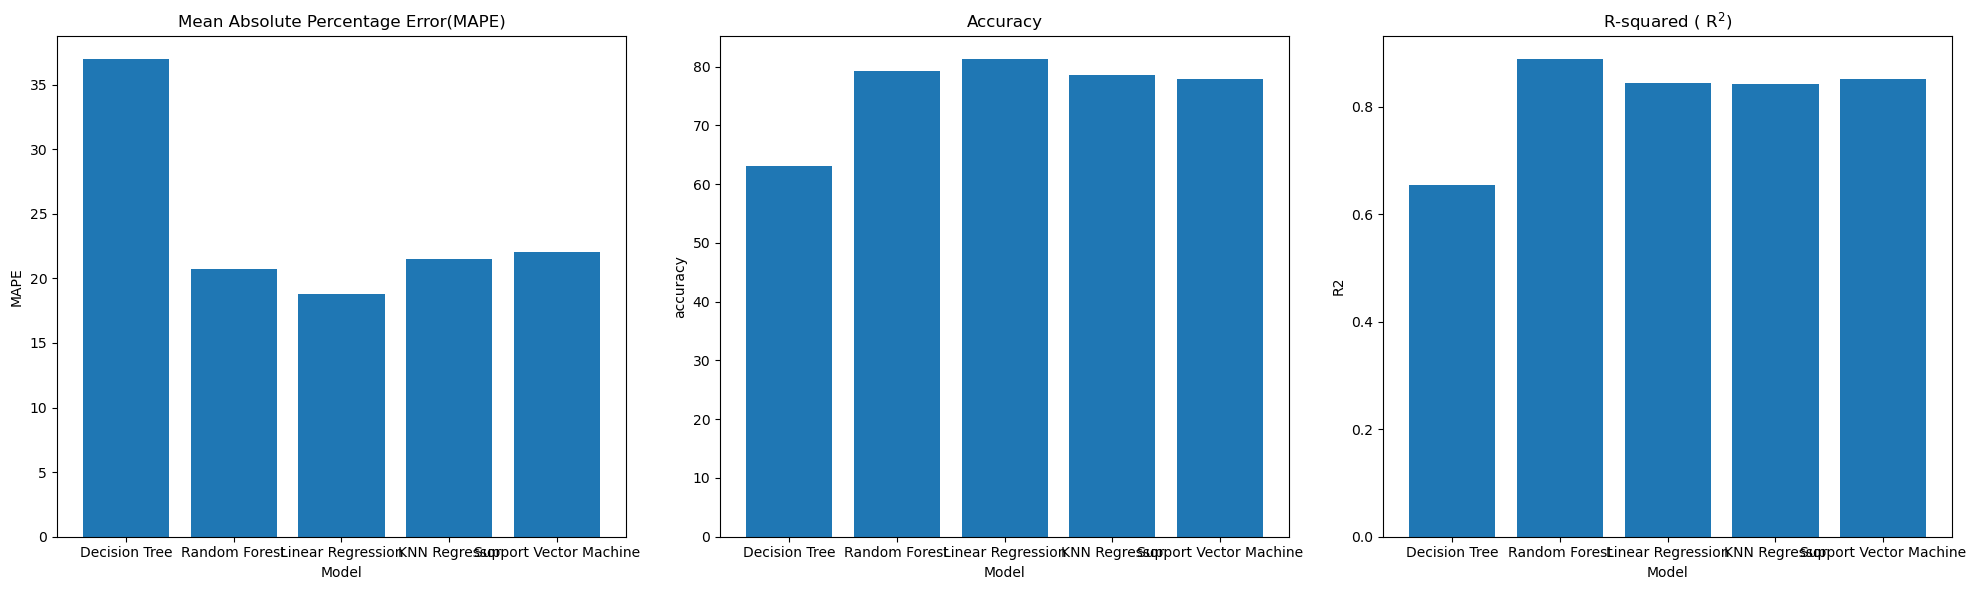

In [52]:
model_names = [ 'Decision Tree', 'Random Forest','Linear Regression', 'KNN Regressor', 'Support Vector Machine']

# Define the evaluation metrics for each model
mape_values = [36.94809301452644,20.740956693824327,18.782083030717047,21.478446550328336,22.059875194908876]
accuracy = [63.05190698547356,79.25904330617567,81.21791696928295,78.52155344967167,77.94012480509113]
Rsquare = [0.6544606873373333,0.8878384478817705,0.8434693684177553,0.8419006004824972,0.851832905452725]

# Create a figure and axis object
fig, ax = plt.subplots(1, 3, figsize=(20, 6))

# Plot the MAPE values
ax[0].bar(model_names, mape_values)
ax[0].set_title('Mean Absolute Percentage Error(MAPE)')
ax[0].set_xlabel('Model')
ax[0].set_ylabel('MAPE')

# Plot the Accuracy values
ax[1].bar(model_names, accuracy)
ax[1].set_title('Accuracy')
ax[1].set_xlabel('Model')
ax[1].set_ylabel('accuracy')

# Plot the R2 values
ax[2].bar(model_names, Rsquare)
ax[2].set_title('R-squared ( R$^2$)')
ax[2].set_xlabel('Model')
ax[2].set_ylabel('R2')

# Layout so plots do not overlap
fig.tight_layout()

# Display the plot
plt.show()

## Report on challenges Faced

__1.Data Cleaning & Feature Selection__

* Removed irrelevant columns (instant, dteday, casual, registered).

* Prevented redundancy and data leakage.

__2.Categorical & Numerical Handling__

* Separated variables for proper preprocessing.

* Required encoding and normalization.

__3.Outlier Detection__

* Identified outliers in numeric features.

* Used statistical methods for treatment.

__4.Model Evaluation__

* Balancing accuracy and generalization.

* Faced underfitting (linear models) and overfitting (complex models).

